In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
from rasterio.plot import show_hist
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
from src.preprocessing.visualisation import plot_rgb_hist, plot_rgb_boxes
from src.preprocessing.normalization import rgb_array, max_norm, perc_norm

In [16]:
#Export shapefiles to a geojson with bounding box
import geopandas
liebre15_whales_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/Final_boxes/liebre2015_whales_final_boxes2.shp"
liebre15_box_shpfile = geopandas.read_file(liebre15_whales_shp_path)
liebre15_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/liebre2015_whales_final_boxes.geojson', driver='GeoJSON')

In [17]:
liebre15_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre15_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/liebre2015_whales_final_boxes.geojson"

## Liebre image 1

Normalize image array using to 0-255 using the 98th percentile as the maximum scaling value.

In [7]:
rgb_perc_norm = perc_norm(liebre15_image_path)

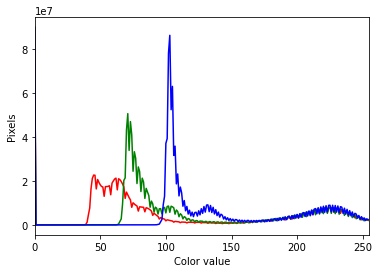

In [8]:
plot_rgb_hist(rgb_perc_norm, 255)

In [9]:
uint8_perc_norm = np.uint8(rgb_perc_norm)

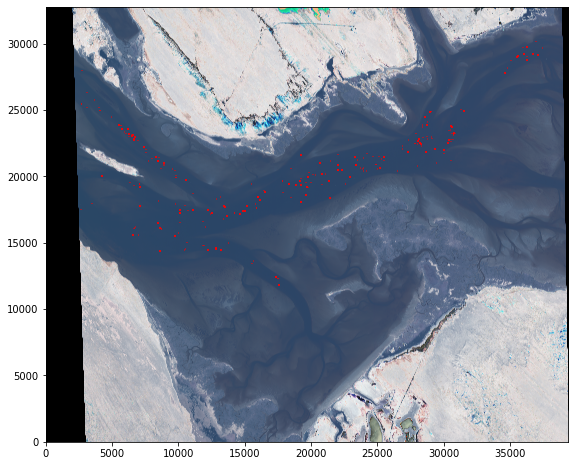

In [18]:
plot_rgb_boxes(liebre15_image_path, liebre15_box_path, uint8_perc_norm)

In [3]:
from src.preprocessing.satellitedataprocessing import convert_coords, save_files, read_coords, get_bbox_info, get_nonwhale_bbox_info

In [20]:
image = Image.fromarray(uint8_perc_norm)
geo_image = rasterio.open(liebre15_image_path)

In [21]:
info = get_bbox_info(liebre15_box_path, image, geo_image)

In [4]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/whales"

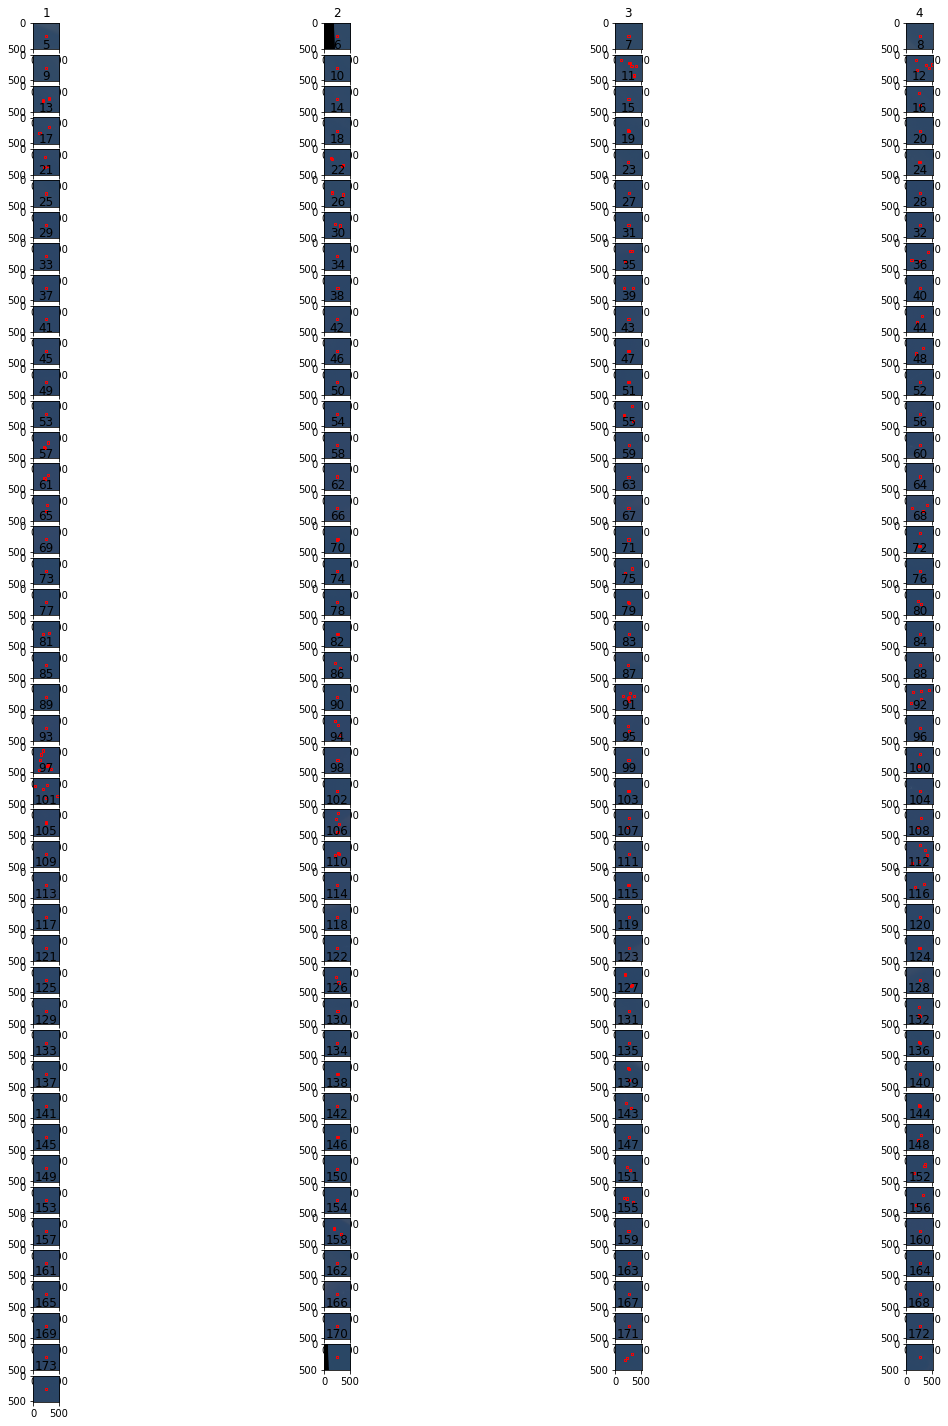

In [23]:
save_files(image, info, file_save_path, 'liebre15')

In [24]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/class1/liebre15_7.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/class1/liebre15_7.txt"

In [25]:
cropped_image = Image.open(cropped_image_path)

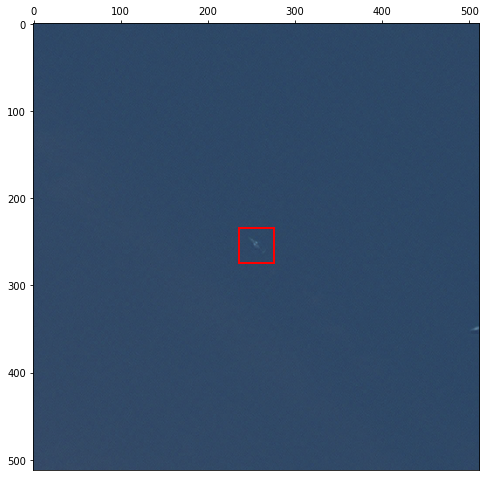

In [26]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## Liebre 2 Image 

In [27]:
import geopandas
liebre13_whales_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/Final_boxes/liebre2013_whales_final_boxes.shp"
liebre13_box_shpfile = geopandas.read_file(liebre13_whales_shp_path)
liebre13_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/liebre2013_whales_final_boxes.geojson', driver='GeoJSON')

In [29]:
liebre13_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre2pansharp.tif"
liebre13_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/liebre2013_whales_final_boxes.geojson"

In [30]:
rgb_perc_norm_l2 = perc_norm(liebre13_image_path)

In [31]:
uint8_perc_norm_l2 = np.uint8(rgb_perc_norm_l2)

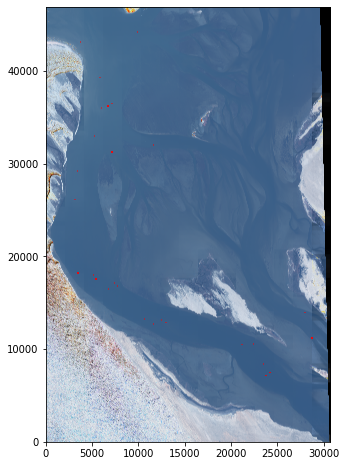

In [32]:
plot_rgb_boxes(liebre13_image_path, liebre13_box_path, uint8_perc_norm_l2)

In [33]:
image_l2 = Image.fromarray(uint8_perc_norm_l2)
geo_image_l2 = rasterio.open(liebre13_image_path)

In [34]:
info_l2 = get_bbox_info(liebre13_box_path, image_l2, geo_image_l2)

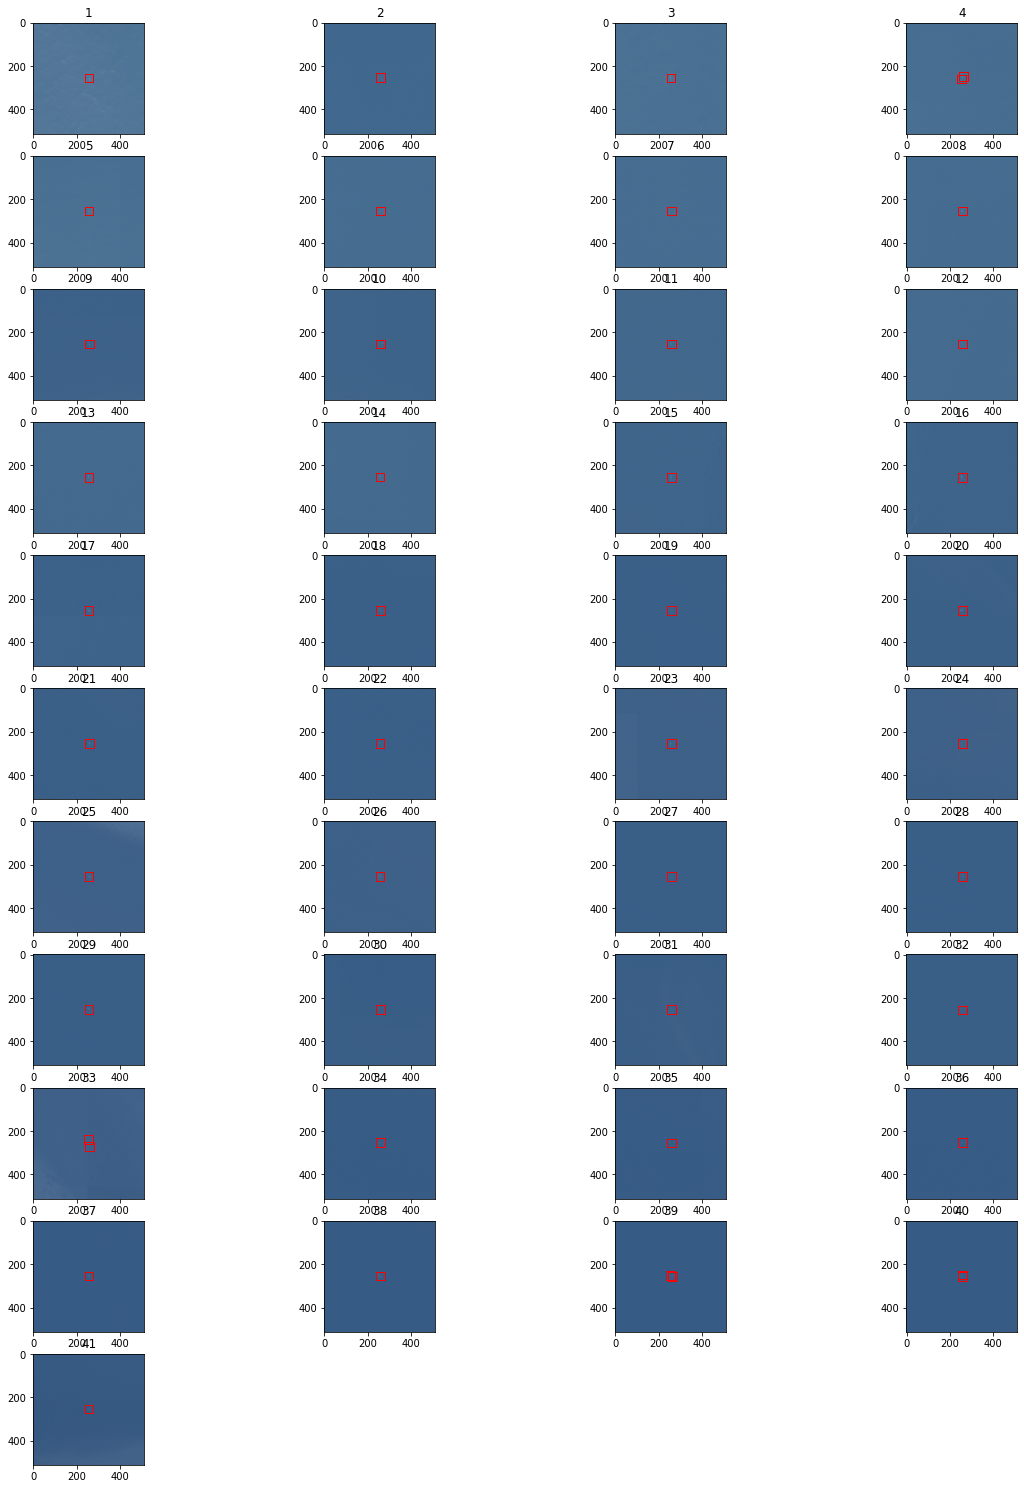

In [35]:
save_files(image_l2, info_l2, file_save_path, 'liebre13')

In [36]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_13.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/cropped_images/liebre2_13.txt"

In [38]:
import pandas as pd 
#boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
#boxes

In [ ]:
cropped_image = Image.open(cropped_image_path)

In [ ]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()



## San Ignacio Image

In [ ]:
#file_save_path_si = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test"

In [39]:
#Export shapefiles to a geojson with bounding box
import geopandas
sanig1_whales_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/Final_boxes/Whales_SanIgnacio8B_def_prob_boxes.shp"
sanig1_box_shpfile = geopandas.read_file(sanig1_whales_shp_path)
sanig1_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/sanig2018final_whale_boxes.geojson', driver='GeoJSON')

In [5]:
sanig1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig_crop_final.tif"
sanig1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/sanig2018final_whale_boxes.geojson"

In [6]:
import geopandas
boxes = geopandas.read_file(sanig1_box_path)
boxes.head(13)

Id                                           Comments  BoL  BoW  BoS  \
0   0.0                           adult, below the surface  1.0  1.0  1.0   
1   0.0  adult, below the surface, with maybe the head ...  2.0  2.0  2.0   
2   0.0  adult below the surface, with maybe its lower ...  2.0  2.0  2.0   
3   0.0                            adult below the surface  2.0  2.0  2.0   
4   0.0            possible mother of mother anc calf pair  2.0  2.0  2.0   
5   0.0                            adult below the surface  1.0  2.0  2.0   
6   0.0                            adult below the surface  1.0  1.0  1.0   
7   0.0                            adult below the surface  2.0  1.0  1.0   
8   0.0          adult below the surface (very deep below)  1.0  1.0  2.0   
9   0.0     adult below the surface (close to the surface)  2.0  2.0  2.0   
10  0.0  adult below the surface, (diving with the fluk...  2.0  1.0  2.0   
11  0.0  adult above and below the surface, might not b...  2.0  2.0  2.0   
12  0.0  possible mother and calf pair, likely below th...  2.0  2.0  2.0   

    BoC  FlukeP  Blow  Contour  Wake  ...  Flipper  Certainty2  CertaintyV  \
0   1.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
1   2.0     0.0   0.0      0.0   0.0  ...      0.0    Definite        None   
2   2.0     0.0   0.0      0.0   0.0  ...      1.0    Definite        None   
3   1.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
4   2.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
5   2.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
6   2.0     0.0   0.0      0.0   0.0  ...      0.0    Definite        None   
7   1.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
8   2.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
9   2.0     0.0   0.0      0.0   0.0  ...      0.0    Definite        None   
10  2.0     0.0   0.0      0.0   0.0  ...      0.0    Definite        None   
11  2.0     0.0   0.0      0.0   0.0  ...      0.0    Probable        None   
12  2.0     0.0   0.0      0.0   0.0  ...      0.0    Definite        None   

    ClassScore  BUFF_DIST  ORIG_FID Shape_Leng  Shape_Area  ORIG_FID_1  \
0          5.0       10.0         0  62.831853  314.159265           1   
1          7.0       10.0         1  62.831853  314.159265           2   
2         12.0       10.0         2  62.831853  314.159265           3   
3          5.5       10.0         3  62.831853  314.159265           4   
4          6.0       10.0         4  62.831853  314.159265           5   
5          5.0       10.0         5  62.831853  314.159265           6   
6          7.5       10.0         6  62.831853  314.159265           7   
7          6.0       10.0         7  62.831853  314.159265           8   
8          4.5       10.0         8  62.831853  314.159265           9   
9         10.0       10.0         9  62.831853  314.159265          10   
10        11.5       10.0        10  62.831853  314.159265          11   
11         6.0       10.0        11  62.831853  314.159265          12   
12        10.0       10.0        12  62.831853  314.159265          13   

                                             geometry  
0   POLYGON ((275873.342 2963594.126, 275873.342 2...  
1   POLYGON ((276033.196 2963729.853, 276033.196 2...  
2   POLYGON ((276275.052 2963441.351, 276275.052 2...  
3   POLYGON ((275935.369 2963435.760, 275935.369 2...  
4   POLYGON ((275678.167 2962915.641, 275678.167 2...  
5   POLYGON ((276693.713 2962274.849, 276693.713 2...  
6   POLYGON ((276354.468 2962187.285, 276354.468 2...  
7   POLYGON ((276356.479 2962217.078, 276356.479 2...  
8   POLYGON ((275982.428 2961799.104, 275982.428 2...  
9   POLYGON ((275838.145 2961073.711, 275838.145 2...  
10  POLYGON ((275815.655 2961087.999, 275815.655 2...  
11  POLYGON ((275764.061 2961042.226, 275764.061 2...  
12  POLYGON ((275395.207 2961368.769, 275395.207 2...  

[13 rows x 

In [7]:
rgb_perc_norm_si1 = perc_norm(sanig1_image_path)

In [8]:
uint8_perc_norm_si1 = np.uint8(rgb_perc_norm_si1)

In [9]:
print(uint8_perc_norm_si1.dtype)

uint8


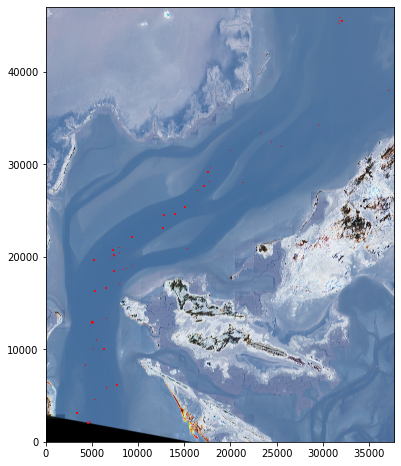

In [10]:
plot_rgb_boxes(sanig1_image_path, sanig1_box_path, uint8_perc_norm_si1)

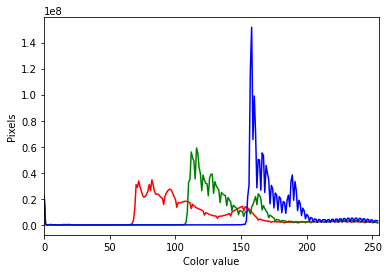

In [11]:
plot_rgb_hist(rgb_perc_norm_si1, 255)

In [12]:
image_si1 = Image.fromarray(uint8_perc_norm_si1)
geo_image_si1 = rasterio.open(sanig1_image_path)

In [13]:
info_si1 = get_bbox_info(sanig1_box_path, image_si1, geo_image_si1)

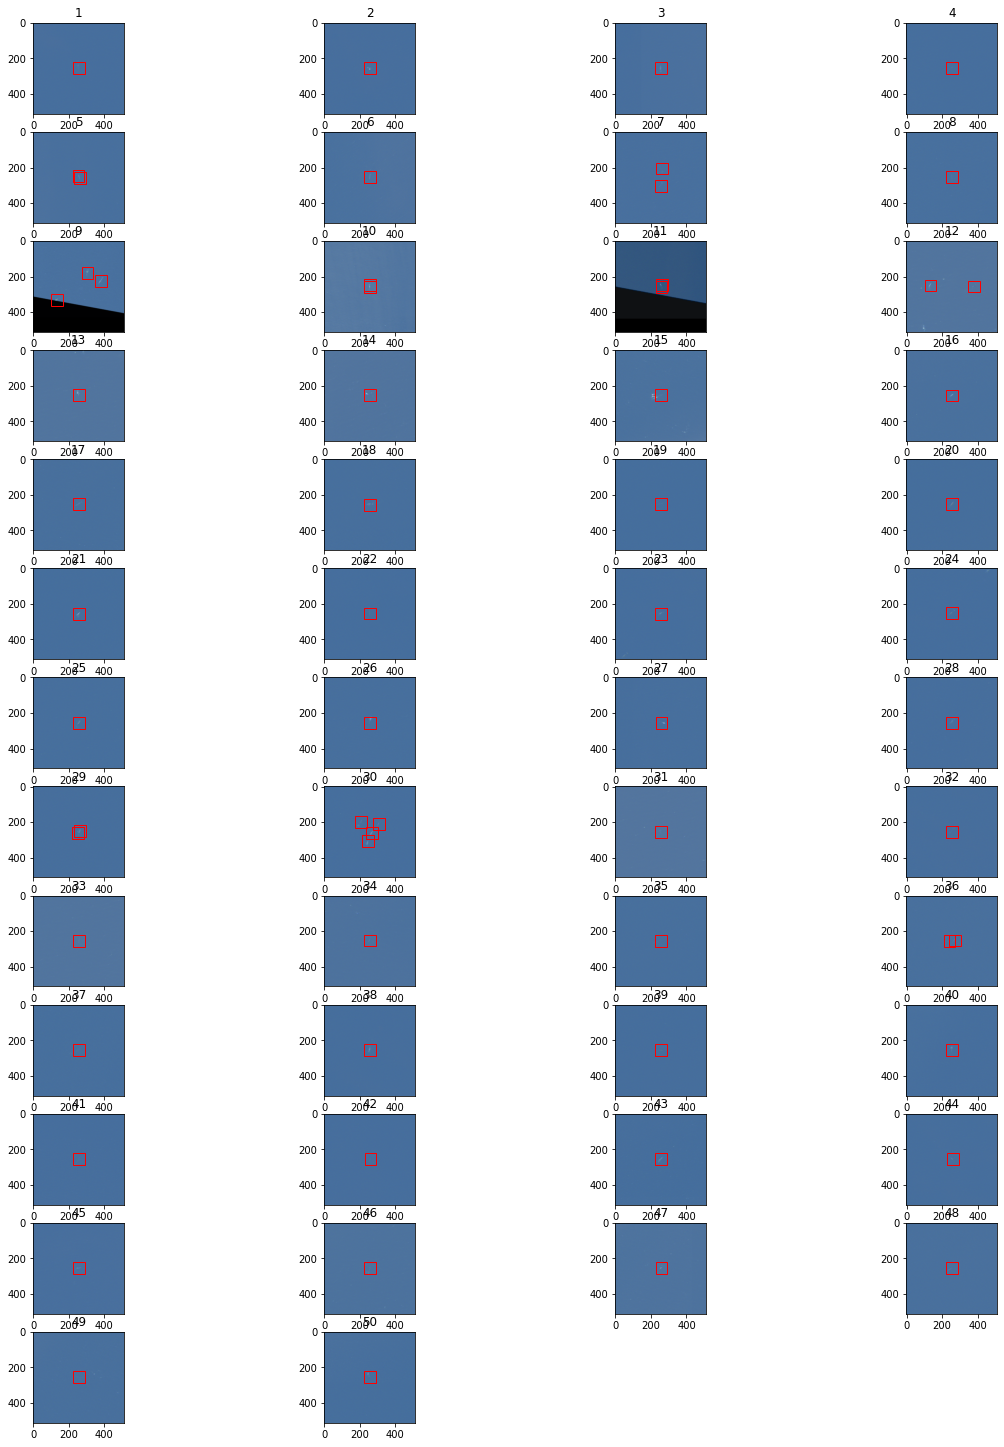

In [14]:
save_files(image_si1, info_si1, file_save_path, 'sanig1')

In [16]:
#print(type(image_si))

In [ ]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/sanig_10.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test/sanig_10.txt"

In [ ]:
cropped_image = Image.open(cropped_image_path)

In [ ]:
import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

In [ ]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()

## San Ignacio Test Image

### Whales Image

In [18]:
sanig2_whales_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig2_test_whales.tif"
sanig2_whales_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/sanig2_whales_final_boxes.geojson"

In [17]:
#Export shapefiles to a geojson with bounding box
import geopandas
sanig2_whales_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/Final_boxes/sanig2_whales_final_boxes.shp"
sanig2_box_shpfile = geopandas.read_file(sanig2_whales_shp_path)
sanig2_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Final_boxes/sanig2_whales_final_boxes.geojson', driver='GeoJSON')

In [19]:
rgb_perc_norm_si2 = perc_norm(sanig2_whales_image_path)

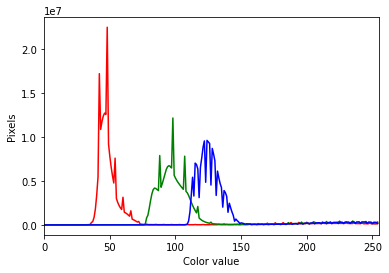

In [20]:
plot_rgb_hist(rgb_perc_norm_si2, 255)

In [21]:
#plot_rgb_hist(rgb_array(sanig2_whales_image_path), 63357)

In [22]:
uint8_perc_norm_si2 = np.uint8(rgb_perc_norm_si2)

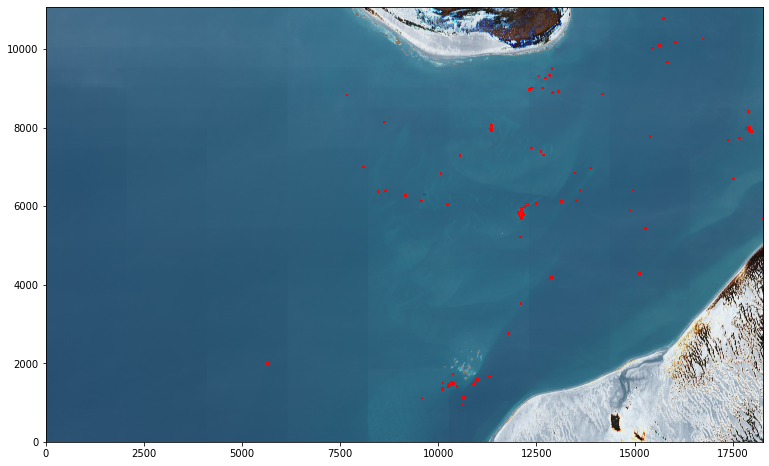

In [23]:
plot_rgb_boxes(sanig2_whales_image_path, sanig2_whales_box_path, uint8_perc_norm_si2)

In [24]:
image_si2 = Image.fromarray(uint8_perc_norm_si2)
geo_image_si2 = rasterio.open(sanig2_whales_image_path)

In [25]:
info_si2 = get_bbox_info(sanig2_whales_box_path, image_si2, geo_image_si2)

In [26]:
#file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/yolo_boats/test/images"

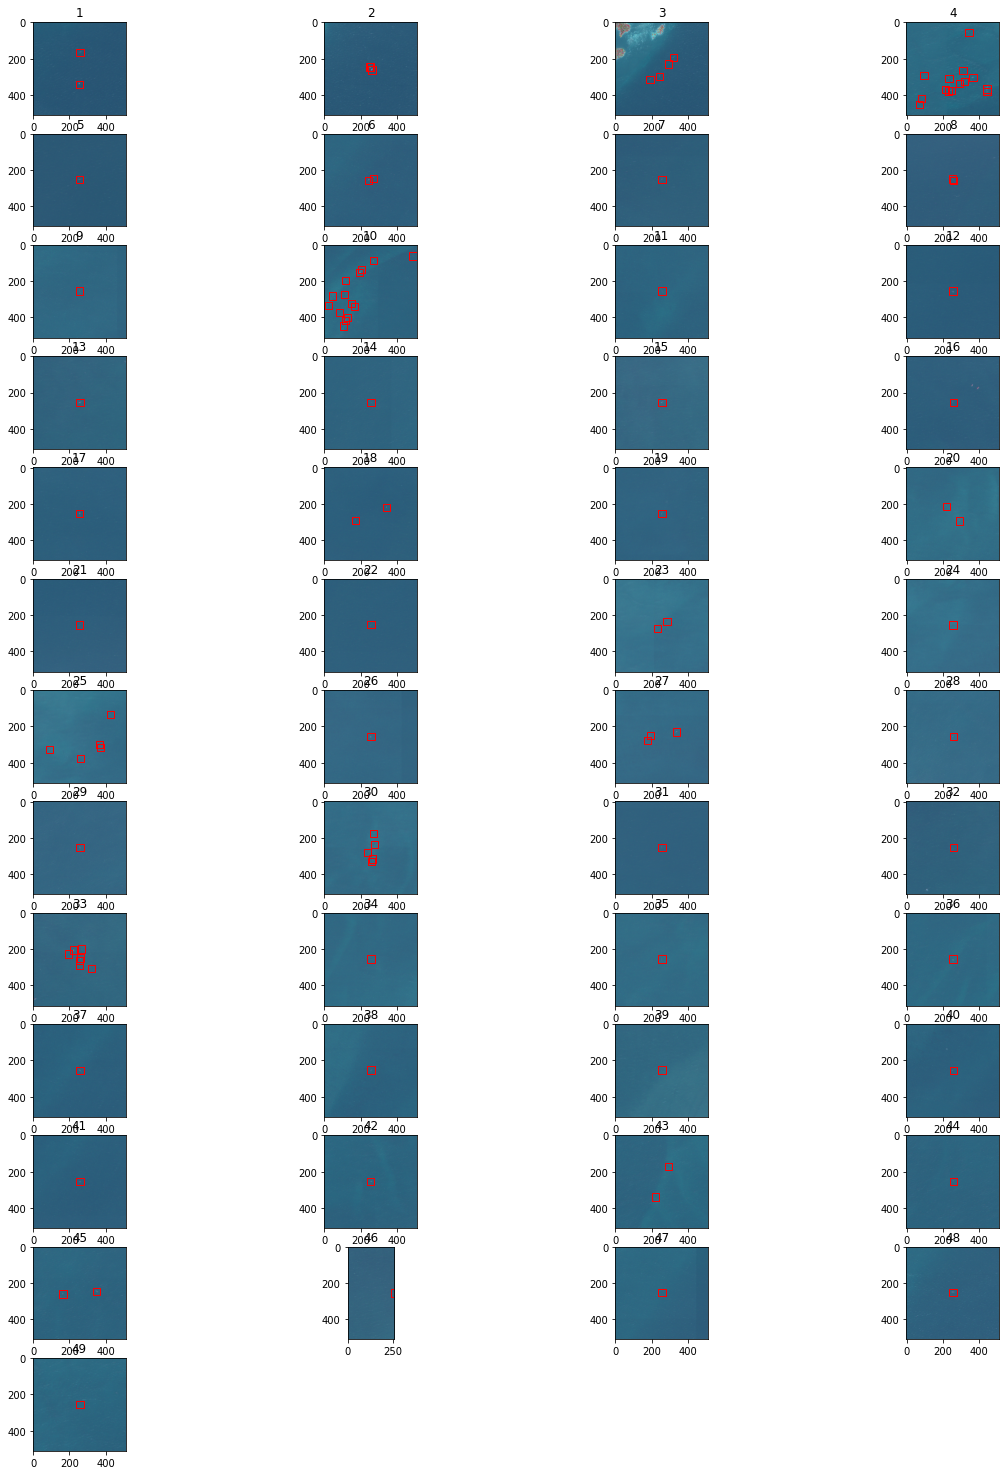

In [27]:
save_files(image_si2, info_si2, file_save_path, 'sanig2')

In [62]:
#Visualise some of the saved files:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/whales/sanig2_29.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/whales/sanig2_29.txt"

In [63]:
cropped_image = Image.open(cropped_image_path)

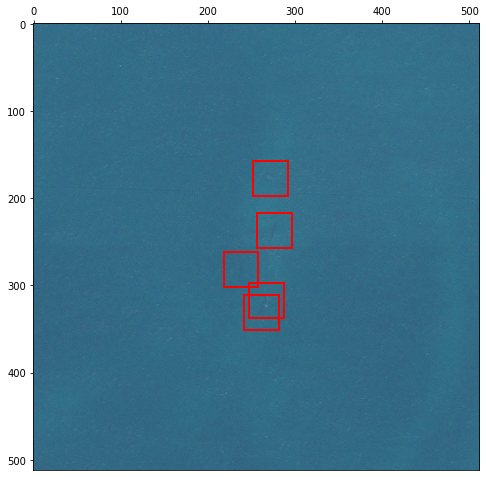

In [64]:
fig, ax = plt.subplots(figsize = (8,11))
ax.xaxis.tick_top()
ax.imshow(cropped_image)

import pandas as pd 
boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*cropped_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*cropped_image.size[1]
    w = boxes[3][i] * cropped_image.size[0]
    h = boxes[4][i] * cropped_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))

plt.show()

### Boats

In [9]:
sanig2_boats_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig2_test_boats3.tif"
sanig2_boats_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/sanig2_test_boats.geojson"

In [29]:
#Export shapefiles to a geojson with bounding box
sanig2_boats_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Boats_SanIgnacio2009_boxes.shp"
sanig2_boats_box_shpfile = geopandas.read_file(sanig2_boats_shp_path)
#sanig2_boats_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Boats_SanIgnacio2009_boxes.geojson', driver='GeoJSON')

In [31]:
rgb_perc_norm_si2b = perc_norm(sanig2_boats_image_path)

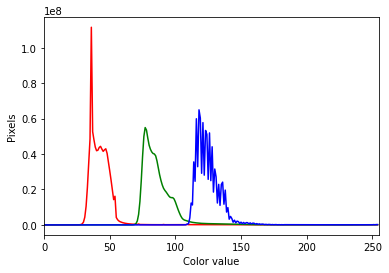

In [32]:
plot_rgb_hist(rgb_perc_norm_si2b, 255)

In [33]:
uint8_perc_norm_si2b = np.uint8(rgb_perc_norm_si2b)

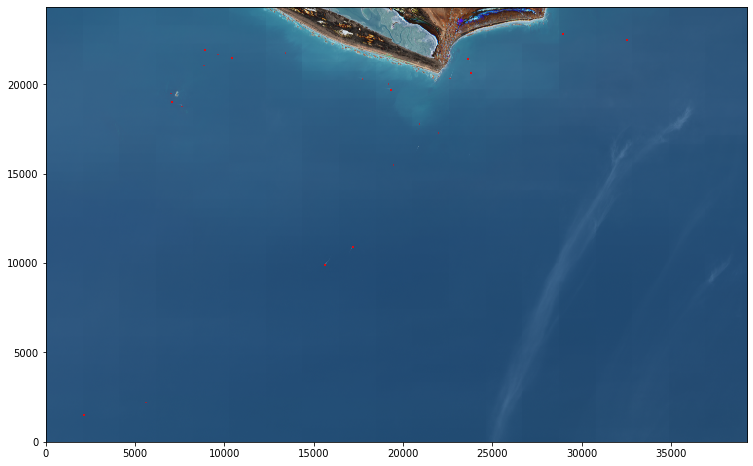

In [34]:
plot_rgb_boxes(sanig2_boats_image_path, sanig2_boats_box_path, uint8_perc_norm_si2b)

In [35]:
image_si2b = Image.fromarray(uint8_perc_norm_si2b)
geo_image_si2b = rasterio.open(sanig2_boats_image_path)

In [36]:
info_si2b = get_nonwhale_bbox_info(sanig2_boats_box_path, image_si2b, geo_image_si2b)

In [14]:
file_save_path_b = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/satellite_images/class2"

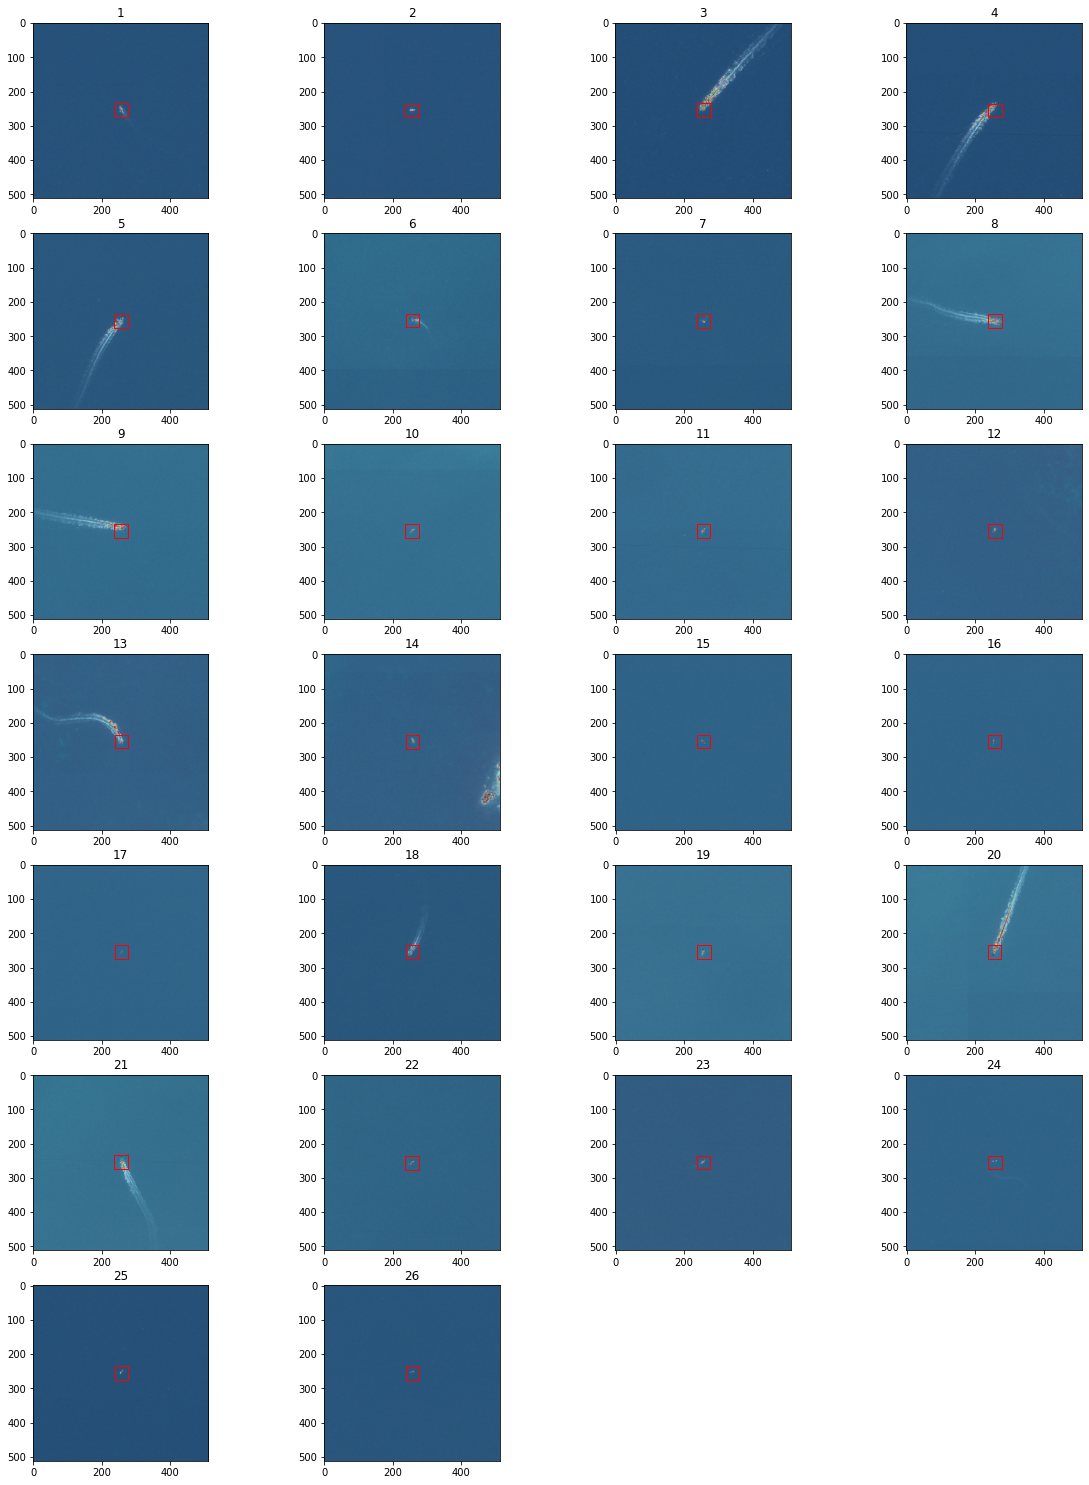

In [38]:
save_files(image_si2b, info_si2b, file_save_path_b, 'sanig2_boats')

In [20]:
liebre15_boats_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Boats_OjoLiebre_2015_boxes_crop.geojson"

In [19]:
#Export shapefiles to a geojson with bounding box
liebre15_boats_shp_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Boats_OjoLiebre_2015_boxes_crop.shp"
liebre15_boats_box_shpfile = geopandas.read_file(liebre15_boats_shp_path)
liebre15_boats_box_shpfile.to_file('/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_bounding_boxes/Boats_OjoLiebre_2015_boxes_crop.geojson', driver='GeoJSON')

In [21]:
info_liebre15b = get_nonwhale_bbox_info(liebre15_boats_box_path, image, geo_image)
print(info_liebre15b)

{0: {'centre': [5260.0, 31126.0], 'object_boxes': [[[5241.021999999881, 31107.908599998802], [5281.021999999882, 31147.908599998802]]], 'name': 'not-whale'}, 1: {'centre': [16934.0, 21552.0], 'object_boxes': [[[16939.039799999446, 21635.972199998796], [16979.039799999446, 21675.972199998796]], [[16973.17100000009, 21620.890999998897], [17013.17100000009, 21660.890999998897]], [[16956.502199999988, 21584.378400001675], [16996.502199999988, 21624.378400001675]], [[16898.558399999514, 21583.584600001574], [16938.558399999514, 21623.584600001574]], [[16962.058599999174, 21543.89699999988], [17002.058599999174, 21583.89699999988]], [[16857.28339999914, 21481.984400000423], [16897.28339999914, 21521.984400000423]], [[16921.43779999949, 21431.549400001764], [16961.43779999949, 21471.549400001764]]], 'name': 'not-whale'}, 2: {'centre': [30580.0, 23746.0], 'object_boxes': [[[30561.77040000074, 23726.0009999983], [30601.770400000732, 23766.0009999983]]], 'name': 'not-whale'}, 3: {'centre': [3450

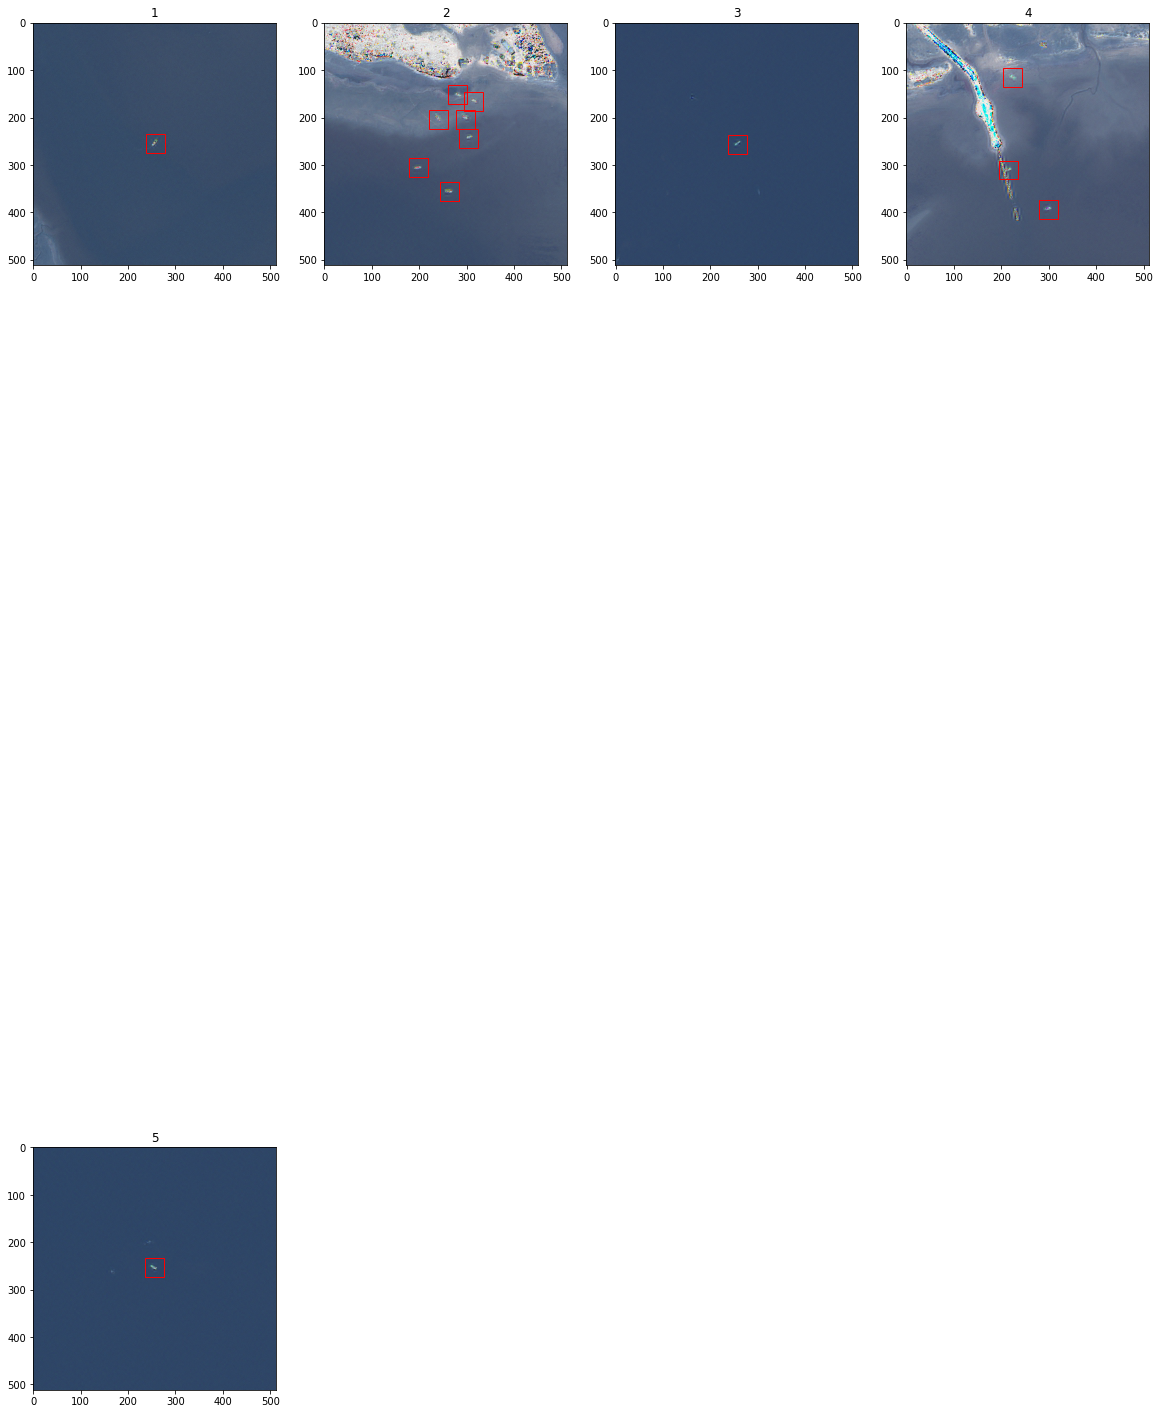

In [22]:
save_files(image, info_liebre15b, file_save_path_b, 'liebre15_boats')

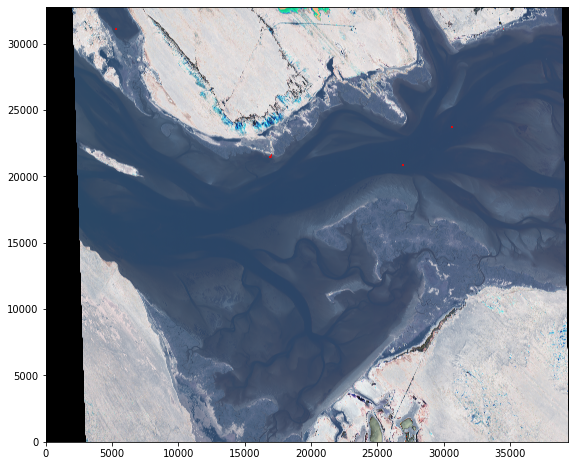

In [12]:
plot_rgb_boxes(liebre15_image_path, liebre15_boats_box_path, uint8_perc_norm)

In [15]:
import geopandas
boxes = geopandas.read_file(liebre15_boats_box_path)
boxes

Id  BUFF_DIST  ORIG_FID  Shape_Leng  Shape_Area  ORIG_FID_1  \
0     0       10.0         0   62.831853  314.159265           1   
1     0       10.0         1   62.831853  314.159265           2   
2     0       10.0         2   62.831853  314.159265           3   
3     0       10.0         3   62.831853  314.159265           4   
4     0       10.0         4   62.831853  314.159265           5   
..   ..        ...       ...         ...         ...         ...   
98    0       10.0        98   62.831853  314.159265          99   
99    0       10.0        99   62.831853  314.159265         100   
100   0       10.0       100   62.831853  314.159265         101   
101   0       10.0       101   62.831853  314.159265         102   
102   0       10.0       102   62.831853  314.159265         103   

                                              geometry  
0    POLYGON ((783285.204 3104618.698, 783285.204 3...  
1    POLYGON ((783287.586 3104582.582, 783287.586 3...  
2    POLYGON ((783324.892 3104579.407, 783324.892 3...  
3    POLYGON ((783209.004 3104559.563, 783209.004 3...  
4    POLYGON ((783193.050 3104571.073, 783193.050 3...  
..                                                 ...  
98   POLYGON ((793085.211 2991211.969, 793085.211 2...  
99   POLYGON ((793109.421 2991241.338, 793109.421 2...  
100  POLYGON ((793033.895 2991107.274, 793033.895 2...  
101  POLYGON ((793174.786 2991074.333, 793174.786 2...  
102  POLYGON ((783509.519 2988473.552, 783509.519 2...  

[103 rows x 7 columns]